In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df =pd.read_csv('stockData.csv')
#print the head
df.head()

C:\Users\I330033\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


0      2018-09-28
1      2018-09-27
2      2018-09-26
3      2018-09-25
4      2018-09-24
5      2018-09-21
6      2018-09-19
7      2018-09-18
8      2018-09-17
9      2018-09-14
10     2018-09-12
11     2018-09-11
12     2018-09-10
13     2018-09-07
14     2018-09-06
15     2018-09-05
16     2018-09-04
17     2018-09-03
18     2018-08-31
19     2018-08-30
20     2018-08-29
21     2018-08-28
22     2018-08-27
23     2018-08-24
24     2018-08-23
25     2018-08-21
26     2018-08-20
27     2018-08-17
28     2018-08-16
29     2018-08-14
          ...    
1990   2010-09-22
1991   2010-09-21
1992   2010-09-20
1993   2010-09-17
1994   2010-09-16
1995   2010-09-15
1996   2010-09-14
1997   2010-09-13
1998   2010-09-09
1999   2010-09-08
2000   2010-09-07
2001   2010-09-06
2002   2010-09-03
2003   2010-09-02
2004   2010-09-01
2005   2010-08-31
2006   2010-08-30
2007   2010-08-27
2008   2010-08-26
2009   2010-08-25
2010   2010-08-24
2011   2010-08-23
2012   2010-08-20
2013   2010-08-19
2014   201

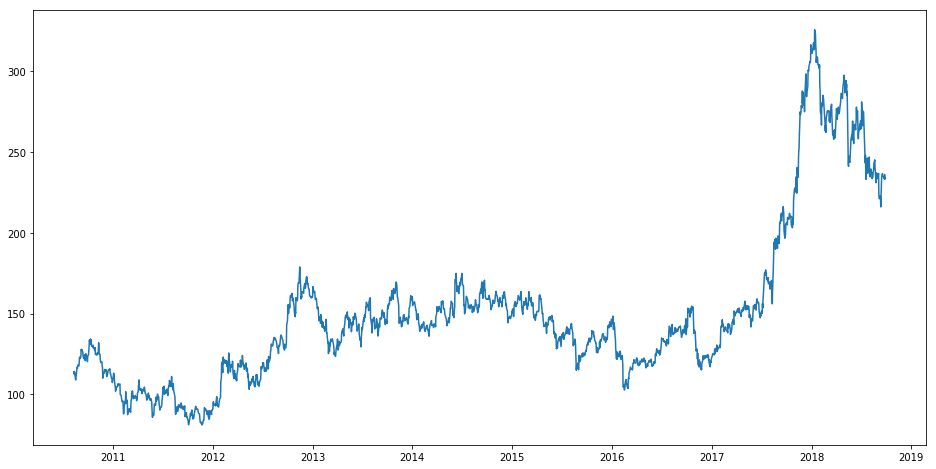

In [2]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,infer_datetime_format=True)
print(df['Date'])
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')


In [17]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
print("inputs", inputs)
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print("X_test", X_test)
closing_price = model.predict(X_test)
print("closing_price",closing_price)
closing_price = scaler.inverse_transform(closing_price)
print("closing_price", closing_price)





#test


C:\Users\I330033\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


Epoch 1/1
 - 35s - loss: 0.0010
inputs [[151.3]
 [149.45]
 [148.35]
 ...
 [234.25]
 [233.25]
 [233.75]]
X_test [[[0.28737745]
  [0.27982026]
  [0.2753268 ]
  ...
  [0.3255719 ]
  [0.31964869]
  [0.31760621]]

 [[0.27982026]
  [0.2753268 ]
  [0.2685866 ]
  ...
  [0.31964869]
  [0.31760621]
  [0.30984477]]

 [[0.2753268 ]
  [0.2685866 ]
  [0.26205065]
  ...
  [0.31760621]
  [0.30984477]
  [0.30882353]]

 ...

 [[0.74754902]
  [0.76960784]
  [0.7495915 ]
  ...
  [0.62765523]
  [0.62234477]
  [0.63378268]]

 [[0.76960784]
  [0.7495915 ]
  [0.81719771]
  ...
  [0.62234477]
  [0.63378268]
  [0.62622549]]

 [[0.7495915 ]
  [0.81719771]
  [0.80208333]
  ...
  [0.63378268]
  [0.62622549]
  [0.62214052]]]
closing_price [[0.2929864 ]
 [0.2939121 ]
 [0.29390785]
 ...
 [0.57013744]
 [0.5721876 ]
 [0.57273614]]
closing_price [[152.67307]
 [152.89969]
 [152.89864]
 ...
 [220.51965]
 [221.02153]
 [221.1558 ]]


In [18]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)

11.591159061059177


C:\Users\I330033\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


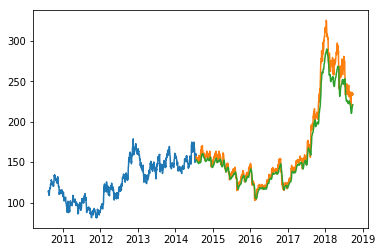

In [19]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])